In [73]:
import pandas as pd
#a=pd.read_csv('abc_news.csv')
a=pd.read_csv('abc_news_contents_1.csv')

data=a.iloc[:,4]

In [75]:
print(data.head())

0    PUERTO JIMÉNEZ, Costa Rica -- The endangered G...
1    For one high school student in New Jersey, a s...
2    Red Dye No. 40, a synthetic food dye that's us...
3    The emergence of generative artificial intelli...
4    WASHINGTON -- Russell Hedrick, a North Carolin...
Name: 본문, dtype: object


In [125]:
import spacy

# spaCy 언어 모델 로드 (en_core_web_sm 사용 예시)
nlp = spacy.load("en_core_web_sm")

# 텍스트 예제
text = data[0]

# 특정 단어 제거 함수
def remove_words(doc, words_to_remove):
    # words_to_remove는 삭제하려는 단어 리스트
    return [token.text for token in doc if token.text not in words_to_remove]

# 토큰화 및 단어 제거
words_to_remove = ['n\'t','Albertsons','Kroger','”','”','“','“','?','\'t','(',')','but','\'re','$','%','&','!','your','you','it','his','\'s','he','_',' ',"by", "the","'",',','an','or','and','its','from','a','to','in','for','.','The','that','’s','at','of','be','about','new','on',';','with','are','more','is','-']  # 제거하고자 하는 단어 리스트

tokens=[]
for i in range(len(data)):
    doc=nlp(data[i])
    filtered_tokens = remove_words(doc, words_to_remove)
    tokens.append(filtered_tokens)

# 결과 출력
print(tokens)

[['PUERTO', 'JIMÉNEZ', 'Costa', 'Rica', '--', 'endangered', 'Geoffrey', 'spider', 'monkeys', 'dangle', 'high', 'rainforest', 'canopy', 'elusive', 'hard', 'scientists', 'track', '\n', 'So', 'biologist', 'Jenna', 'Lawson', 'hid', '350', 'audio', 'monitors', 'trees', 'across', 'Costa', 'Rica', 'lush', 'Osa', 'Peninsula', 'spy', 'them', '\n', 'devices', 'recorded', 'sounds', 'forest', 'surrounding', 'countryside', 'week', 'collecting', 'so', 'much', 'data', 'Lawson', 'could', 'have', 'spent', 'years', 'listening', 'all', '\n', 'Instead', 'she', 'fed', 'into', 'artificial', 'intelligence', 'systems', 'trained', 'instantly', 'recognize', 'spider', 'monkey', 'calls', 'detect', 'where', 'animals', 'traveled', 'One', 'world', 'largest', 'acoustic', 'wildlife', 'studies', 'when', 'Lawson', 'began', 'project', '2021', 'revealed', 'troubling', 'findings', 'health', 'treasured', 'wildlife', 'refuge', '\n', 'More', 'this', 'AI', 'assisted', 'wildlife', 'surveillance', 'urgently', 'needed', 'as', 'so

In [126]:
#!pip install gensim
from gensim import corpora


dictionary = corpora.Dictionary(tokens) # 토큰 단어와 gensim 내부 아이디 매칭
dictionary.filter_extremes(no_below=3, no_above=0.5) # 빈도 2이상 포함, 전체 50% 이상 단어 제거
corpus = [dictionary.doc2bow(token) for token in tokens] 
print(corpus)

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 4), (6, 1), (7, 1), (8, 1), (9, 2), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 2), (16, 5), (17, 1), (18, 1), (19, 2), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 2), (29, 1), (30, 3), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 2), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 2), (45, 3), (46, 1), (47, 1), (48, 1), (49, 1), (50, 2), (51, 2), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 2), (62, 1), (63, 3), (64, 3), (65, 1), (66, 1), (67, 1), (68, 1), (69, 1), (70, 1), (71, 1), (72, 1), (73, 4), (74, 2), (75, 1), (76, 1), (77, 1), (78, 1), (79, 1), (80, 1), (81, 1), (82, 1), (83, 1), (84, 4), (85, 1), (86, 2), (87, 1), (88, 1), (89, 1), (90, 2), (91, 2), (92, 1), (93, 3), (94, 1), (95, 1), (96, 1), (97, 1), (98, 1), (99, 1), (100, 1), (101, 1), (102, 1), (103, 1), (104, 1), (105, 1), (106, 1), (107, 3), (108, 1), (109, 1), (110, 1)

k= 2 
Coherence Score:  0.30245228180783423
k= 3 
Coherence Score:  0.6108736910037932
k= 4 
Coherence Score:  0.5024997575016994
k= 5 
Coherence Score:  0.4791991302378629
k= 6 
Coherence Score:  0.617817143132776
k= 7 
Coherence Score:  0.44811319053601306
k= 8 
Coherence Score:  0.43084330560549233
k= 9 
Coherence Score:  0.5153951032745584


Text(0.5, 0, 'Number Of Topic (2-10)')

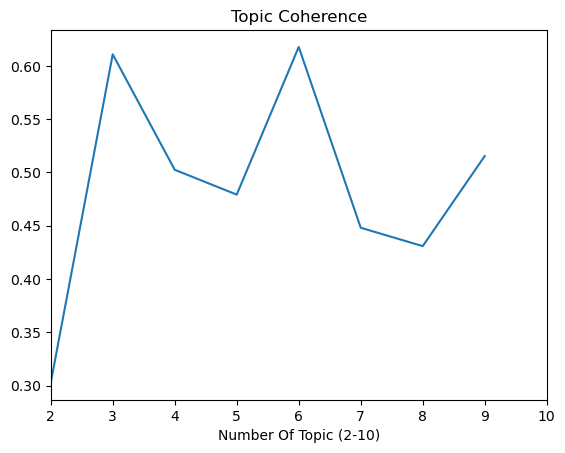

In [79]:
import gensim
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt

coherence_score=[]

for i in range(2,10):
    model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=i, passes= 5)
    coherence_model = CoherenceModel(model, texts=tokens, dictionary=dictionary, coherence='c_v')
    coherence_lda = coherence_model.get_coherence()
    print('k=',i,'\nCoherence Score: ', coherence_lda)
    coherence_score.append(coherence_lda)

k=[]
for i in range(2,10):
    k.append(i)

x = k
y= coherence_score
plt.title('Topic Coherence')
plt.plot(x,y)
plt.xlim(2,10)
plt.xlabel('Number Of Topic (2-10)')

In [127]:
final_model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=3, passes= 30)
final_model.print_topics()

#%pip install pyLDAvis
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

prepared_data = gensimvis.prepare(final_model, corpus, dictionary)
pyLDAvis.display(prepared_data)